In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df=pd.read_csv("Employee.csv")

df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [3]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [5]:
unique_values = {}  # Create a dictionary to store unique values and their lengths

for column in df.columns:
    unique = df[column].unique()  # Get unique values for the column
    length = len(unique)  # Get the length of unique values
    unique_values[column] = {"unique_values": unique, "length": length}

# Print the unique values and their lengths for each feature
for column, values in unique_values.items():
    print(f"Feature: {column}")
    print(f"Unique Values: {values['unique_values']}")
    print(f"Number of Unique Values: {values['length']}")
    print()


Feature: Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of Unique Values: 7

Feature: Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of Unique Values: 30

Feature: Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of Unique Values: 41

Feature: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of Unique Values: 12

Feature: Country
Unique Values: ['India']
Number of Unique Values: 1

Feature: Gender
Unique Values: [0 1]
Number of Unique Values: 2



In [6]:
#Check for NaN values in the DataFrame
nan_values = df.isna().sum()

# Display the NaN values for each column
print(nan_values)





Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


In [7]:
df['Company'] = df['Company'].map({'Tata Consultancy Services':'TCS','Congnizant': 'CTS','Infosys Pvt Lmt': 'Infosys'}).fillna(df['Company'])
print("Renamed Company names and value counts \n", df["Company"].value_counts())


Renamed Company names and value counts 
 Company
TCS        55
Infosys    47
CTS        38
Name: count, dtype: int64


In [8]:
# Find duplicate rows based on all columns
duplicates = df[df.duplicated()]

# Print the duplicate rows
print(duplicates)


     Company   Age  Salary     Place Country  Gender
84       CTS  43.0     NaN    Mumbai   India       0
130      TCS  21.0  4824.0    Mumbai   India       0
131  Infosys   NaN  5835.0    Mumbai   India       0
144  Infosys  22.0  8787.0  Calcutta   India       1


In [47]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

df.drop(columns='Country',inplace=True)

In [48]:
df

,Company,Age,Salary,Place,Gender
0,2,20.0,5283.471074,2,0
1,1,30.0,5283.471074,6,0
2,2,35.0,2300.000000,1,0
3,1,40.0,3000.000000,4,0
4,2,23.0,4000.000000,6,0
...,...,...,...,...,...
142,1,22.0,8202.000000,6,0
143,2,33.0,9024.000000,1,1
145,1,44.0,4034.000000,4,1
146,2,33.0,5034.000000,6,1


In [11]:
df.describe()

,Age,Salary,Gender
count,127.000000,121.000000,144.000000
mean,30.527559,5283.471074,0.222222
std,11.114717,2585.373600,0.417191
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,33.000000,5000.000000,0.000000
75%,37.500000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [12]:
q1=df.Age.quantile(0.25)
q1

22.0

In [13]:
q3=df.Age.quantile(0.75)
q3

37.5

In [14]:
q2=df.Age.quantile(0.50)
q2

33.0

In [15]:
IQR=q3-q1 
IQR

15.5

In [16]:
lower=q1-1.5*IQR
upper=q3+1.5*IQR

lower,upper

(-1.25, 60.75)

In [17]:
df[(df.Age<lower) | (df.Age>upper)]  #outliers

,Company,Age,Salary,Place,Country,Gender


In [19]:
#here no outliers are found

#Replace the value 0 in age as NaN
df['Age'] = df['Age'].replace(0, np.nan)

df['Age']

0      20.0
1      30.0
2      35.0
3      40.0
4      23.0
       ... 
142    22.0
143    33.0
145    44.0
146    33.0
147    22.0
Name: Age, Length: 144, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_10044\2066050439.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"],color='r')


<Axes: xlabel='Age', ylabel='Density'>

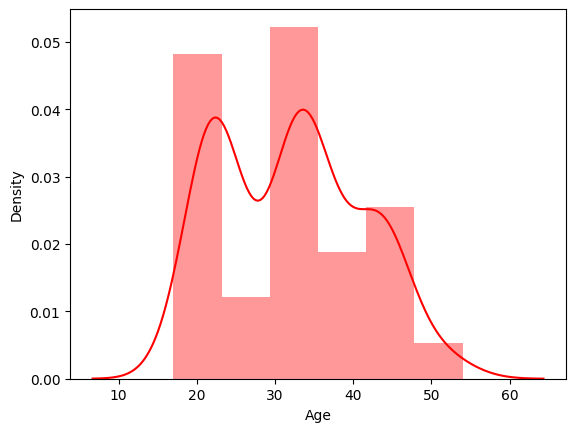

In [21]:
sns.distplot(df["Age"],color='r')

C:\Users\User\AppData\Local\Temp\ipykernel_10044\2802703541.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Salary"],color='r')


<Axes: xlabel='Salary', ylabel='Density'>

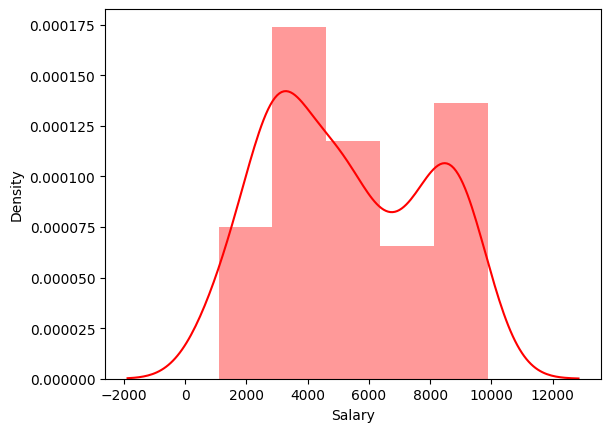

In [22]:
sns.distplot(df["Salary"],color='r')

In [23]:
df['Age'].fillna(df['Age'].mean(), inplace=True)


In [24]:
df['Salary'].fillna(df['Salary'].mean(), inplace=True)


In [25]:
df['Company'].fillna('Infosys', inplace=True)


In [26]:
df['Place'].fillna('Calcutta', inplace=True)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  144 non-null    object 
 1   Age      144 non-null    float64
 2   Salary   144 non-null    float64
 3   Place    144 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB


In [28]:
#Filter the data with age >40 and salary<5000

df[(df.Age>40)&(df.Salary<5000)]


,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


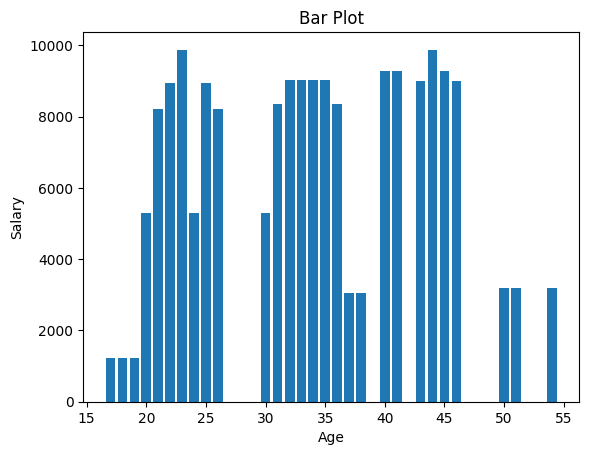

<Figure size 600x300 with 0 Axes>

In [30]:


x=df.Age
y=df.Salary
plt.bar(x,y)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Bar Plot')
plt.figure(figsize=(6,3))
plt.show()

In [31]:
place_counts = df['Place'].value_counts()


In [32]:
place_counts

Place
Calcutta      46
Mumbai        34
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

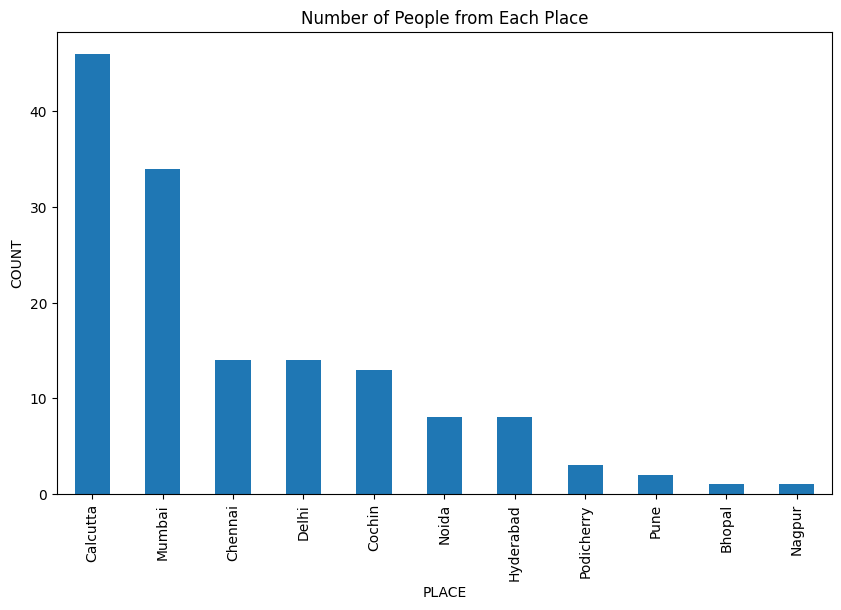

In [36]:
# Create a bar chart for the number of people from each place
plt.figure(figsize=(10, 6))
place_counts.plot(kind='bar')
plt.title('Number of People from Each Place')
plt.xlabel('PLACE')
plt.ylabel('COUNT')
plt.show()


In [37]:
df_one_hot_encoded = pd.get_dummies(data = df, columns = ["Company", "Place"])

print(df_one_hot_encoded )

      Age       Salary Country  Gender  Company_CTS  Company_Infosys  \
0    20.0  5283.471074   India       0        False            False   
1    30.0  5283.471074   India       0        False             True   
2    35.0  2300.000000   India       0        False            False   
3    40.0  3000.000000   India       0        False             True   
4    23.0  4000.000000   India       0        False            False   
..    ...          ...     ...     ...          ...              ...   
142  22.0  8202.000000   India       0        False             True   
143  33.0  9024.000000   India       1        False            False   
145  44.0  4034.000000   India       1        False             True   
146  33.0  5034.000000   India       1        False            False   
147  22.0  8202.000000   India       0        False             True   

     Company_TCS  Place_Bhopal  Place_Calcutta  Place_Chennai  Place_Cochin  \
0           True         False           False          

In [39]:
from sklearn.preprocessing import OneHotEncoder

cols_to_encode = ["Company", "Place"]
new_encoded_cols_names = []
for col in cols_to_encode:
    new_encoded_cols_names += [f"is_{category}" for category in df[col].sort_values().unique().tolist()]

one_hot_encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

encoded_cols = one_hot_encoder.fit_transform(df[cols_to_encode])

df_encoded = pd.DataFrame(encoded_cols, columns = new_encoded_cols_names)
df_one_hot_encoded = df.join(df_encoded)
print(df_one_hot_encoded)

     Company   Age       Salary     Place Country  Gender  is_CTS  is_Infosys  \
0        TCS  20.0  5283.471074   Chennai   India       0     0.0         0.0   
1    Infosys  30.0  5283.471074    Mumbai   India       0     0.0         1.0   
2        TCS  35.0  2300.000000  Calcutta   India       0     0.0         0.0   
3    Infosys  40.0  3000.000000     Delhi   India       0     0.0         1.0   
4        TCS  23.0  4000.000000    Mumbai   India       0     0.0         0.0   
..       ...   ...          ...       ...     ...     ...     ...         ...   
142  Infosys  22.0  8202.000000    Mumbai   India       0     0.0         0.0   
143      TCS  33.0  9024.000000  Calcutta   India       1     0.0         1.0   
145  Infosys  44.0  4034.000000     Delhi   India       1     NaN         NaN   
146      TCS  33.0  5034.000000    Mumbai   India       1     NaN         NaN   
147  Infosys  22.0  8202.000000    Cochin   India       0     NaN         NaN   

     is_TCS  is_Bhopal  is_

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in df[["Company","Place"]]:
    df[i] = label_encoder.fit_transform(df[i])
df

,Company,Age,Salary,Place,Country,Gender
0,2,20.0,5283.471074,2,India,0
1,1,30.0,5283.471074,6,India,0
2,2,35.0,2300.000000,1,India,0
3,1,40.0,3000.000000,4,India,0
4,2,23.0,4000.000000,6,India,0
...,...,...,...,...,...,...
142,1,22.0,8202.000000,6,India,0
143,2,33.0,9024.000000,1,India,1
145,1,44.0,4034.000000,4,India,1
146,2,33.0,5034.000000,6,India,1


In [43]:
from sklearn.preprocessing import StandardScaler




In [53]:
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

# Print the scaled data
print(scaled_data.round(2))

[[ 1.13 -1.46  0.   -0.69 -0.54]
 [-0.14 -0.25  0.    0.9  -0.54]
 [ 1.13  0.36 -1.25 -1.08 -0.54]
 [-0.14  0.96 -0.96  0.11 -0.54]
 [ 1.13 -1.09 -0.54  0.9  -0.54]
 [-0.14  0.   -0.12 -1.08 -0.54]
 [ 1.13  0.    0.3  -0.69  1.85]
 [-0.14 -1.09  0.72  0.9   1.85]
 [ 1.13  0.24  1.14 -1.08  1.85]
 [-1.41  1.57  1.57  0.11 -0.54]
 [-1.41 -1.09  0.    0.9  -0.54]
 [-1.41  0.24 -1.76 -1.08 -0.54]
 [-1.41  1.57  0.   -0.69 -0.54]
 [-1.41 -1.7  -1.7   0.9  -0.54]
 [-0.14  0.96 -0.96 -1.08 -0.54]
 [ 1.13 -1.09 -0.96  0.11 -0.54]
 [-0.14 -1.09 -0.95  2.1  -0.54]
 [ 1.13  0.24 -0.12 -0.29 -0.54]
 [ 1.13 -1.22  0.   -0.69 -0.54]
 [-0.14 -0.01  0.    0.9  -0.54]
 [ 1.13  0.6  -0.94 -1.08 -0.54]
 [-0.14  2.17 -0.88  0.11 -0.54]
 [ 1.13 -1.34 -0.19  0.9  -0.54]
 [-0.14  0.    0.23 -0.29 -0.54]
 [ 1.13  0.    0.76 -0.69  1.85]
 [-0.14 -1.09  1.54  0.9   1.85]
 [ 1.13  0.24  1.29 -1.08  1.85]
 [-1.41  1.57  1.69  0.11  1.85]
 [-1.41 -1.09  1.93  0.9   1.85]
 [-1.41  0.36 -1.37 -0.29 -0.54]
 [-1.41  1

In [50]:
from sklearn.preprocessing import MinMaxScaler


# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

# Print the scaled data
print(scaled_data.round(1))

[[1.  0.1 0.5 0.2 0. ]
 [0.5 0.4 0.5 0.6 0. ]
 [1.  0.5 0.1 0.1 0. ]
 [0.5 0.6 0.2 0.4 0. ]
 [1.  0.2 0.3 0.6 0. ]
 [0.5 0.4 0.4 0.1 0. ]
 [1.  0.4 0.6 0.2 1. ]
 [0.5 0.2 0.7 0.6 1. ]
 [1.  0.5 0.8 0.1 1. ]
 [0.  0.8 0.9 0.4 0. ]
 [0.  0.2 0.5 0.6 0. ]
 [0.  0.5 0.  0.1 0. ]
 [0.  0.8 0.5 0.2 0. ]
 [0.  0.  0.  0.6 0. ]
 [0.5 0.6 0.2 0.1 0. ]
 [1.  0.2 0.2 0.4 0. ]
 [0.5 0.2 0.2 0.9 0. ]
 [1.  0.5 0.4 0.3 0. ]
 [1.  0.1 0.5 0.2 0. ]
 [0.5 0.4 0.5 0.6 0. ]
 [1.  0.5 0.2 0.1 0. ]
 [0.5 0.9 0.2 0.4 0. ]
 [1.  0.1 0.4 0.6 0. ]
 [0.5 0.4 0.5 0.3 0. ]
 [1.  0.4 0.7 0.2 1. ]
 [0.5 0.2 0.9 0.6 1. ]
 [1.  0.5 0.8 0.1 1. ]
 [0.  0.8 0.9 0.4 1. ]
 [0.  0.2 1.  0.6 1. ]
 [0.  0.5 0.1 0.3 0. ]
 [0.  0.8 0.7 0.2 0. ]
 [0.  0.1 0.2 0.6 0. ]
 [0.5 0.8 0.3 0.1 0. ]
 [1.  0.5 0.4 0.1 0. ]
 [0.5 0.2 0.8 0.1 0. ]
 [1.  0.5 0.9 0.1 1. ]
 [1.  0.4 0.5 0.8 0. ]
 [0.5 0.5 0.5 0.5 0. ]
 [1.  0.5 0.1 0.1 0. ]
 [0.5 0.6 0.2 0.6 0. ]
 [1.  0.2 0.4 0.1 0. ]
 [1.  0.4 0.6 0.1 0. ]
 [0.5 0.2 0.7 0.1 0. ]
 [1.  0.5 0